# Structure pour le projet

![Processus de Classification des Images de Champignons](processus.png)

---

## 🌱 1. Introduction

Ce projet de classification d'images de champignons a pour objectif de construire un modèle capable de classifier différentes types de champignons à partir des images dans le dossier mushrooms.

Nous avons décidé d'utiliser un réseau de neurones convolutifs (CNN) basé sur **MobileNet**, un modèle pré-entrainé, et on vas ajuster ce dernier pour identifier trois types de champignons : **Amanita**, **Crimini**, et **Oyster**.

# 🎯 Objectif

🔍 **L’objectif principal de ce projet** :

- Construire un modèle de classification basé sur un réseau de neurones convolutifs (CNN).

- Utiliser **MobileNet** comme modèle pré-entrainé pour cette tâche.

# Pourquoi utiliser **MobileNet**


<img src="mobileNetMushroom.png" alt="Avantages et inconvénients de mobile Net" width="600">

# 💡 Les avantages

1. **Légèreté et efficacité computationnelle**  
   MobileNet est concu pour être rapide et léger, permettant une utilisation optimale des ressources.

2. **Poids pré-entrainés sur ImageNet**  
   Le modèle utilise des poids pré-entrainés sur un large ensemble de données, et est utile même avec un petit jeu de données comme le notre.

3. **Adaptabilité aux petits jeux de données**  
   MobileNet fonctionne bien avec des données limitées (pour notre cas, seulement 1643 images), pour réduire les risques de surapprentissage (overfitting).

4. **Compromis entre performance et coût**  
   MobileNet offre un bon équilibre entre précision et rapidité d'entraînement.

5. **Facilité d'intégration avec Keras**  
   MobileNet s'intègre facilement dans un pipeline de traitement grace à Keras, simplifiant le processus d’entrainement et de fine-tuning.


---

# 🔍 2. Exploration des Données

## 🎯 **Objectif de l'étape**

- L'objectif de cette étape est de charger les données, explorer leur structure et afficher quelques images pour comprendre le contenu du dataset.

- Cela nous permettra également de préparer les données pour l'entraînement.

## 📂 **Exploration du dossier `mushrooms`**

- Nous allons charger les images et analyser leur répartition dans chaque sous-dossier (chaque classe).

- Ensuite, nous allons visualiser quelques images pour avoir un apercu du dataset.


In [1]:
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

In [2]:

# Le chemin du dossier contenant les images
dataset_dir = 'datasets/mushrooms'

# On verifie la repartition des images par classe
classes = ['crimini', 'oyster', 'amanita']
image_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in classes}

## 📚 **Répartition des Images par Classe**


In [3]:

print("Repartition des images par classe :")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")


Repartition des images par classe :
crimini: 561 images
oyster: 547 images
amanita: 535 images


In [4]:

# Visualiser quelques exemples d'images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, class_name in enumerate(classes):
    # On selectionne une image aléatoire de chaque classe
    class_dir = os.path.join(dataset_dir, class_name)
    image_path = os.path.join(class_dir, random.choice(os.listdir(class_dir)))
    
    # Charger et afficher l'image
    img = image.load_img(image_path, target_size=(224, 224))  # Redimensionnement à 224x224 pour MobileNet
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off') 

plt.show()


### 📝 Explication du code

- **Répartition des images par classe**  
  On parcourt les sous-dossiers (`crimini`, `oyster`, `amanita`) et on compte le nombre d'images dans chacun.

- **Visualisation d'exemples d'images**  
  Pour chaque classe, on sélectionne une image aléatoire et on l'affiche après l'avoir redimensionner à **224x224 pixels** qui est une taille compatible avec **MobileNet**.


---

## 🛠️ 3. Préparation des Données

### 🎯 Objectifs de l'étape
L'objectif ici est de préparer les images pour l'entraînement du modèle, et voici les étapes ci-dessous :

- **Diviser les données**  
  Séparer les données en ensembles d'entraînement, de validation et de test.

- **Redimensionner les images**  
  Ajuster la taille des images à **224x224 pixels**, compatible avec **MobileNet**.

- **Normaliser les images**  
  Mettre les images à une échelle de **0 à 1** pour faciliter l'entraînement ( on dévise par 255 )

- **Augmentation des données**  
  Enrichir le dataset par des transformations (rotations, zooms, etc.) pour améliorer la robustesse et la performance du modèle.


In [4]:
import shutil
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input

## 📊 **Répartition que nous avons choisie :**

- **70%** : Données d'entraînement

- **15%** : Données de validation

- **15%** : Données de test


In [5]:

# Chemin du dossier principal
dataset_dir = 'datasets/mushrooms'

# Proportions pour les splits
train_size = 0.7  # 70%
val_size = 0.15   # 15%
test_size = 0.15  # 15% 


In [6]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Chemin du dossier principal
dataset_dir = 'datasets/mushrooms'

# Dossiers cibles
train_dir = 'datasets/train'
val_dir = 'datasets/val'
test_dir = 'datasets/test'

# Créer les répertoires pour train, validation, et test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Fonction pour effectuer le split et déplacer les images
def split_and_move_images(class_name):
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)
    
    # Séparer les images en train, validation et test (70% train, 15% val, 15% test)
    train_images, temp_images = train_test_split(images, test_size=0.30, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.50, random_state=42)  # 50% de 30% -> 15% total

    # Créer les sous-dossiers pour la classe dans les répertoires train, val et test
    for folder in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(folder, class_name), exist_ok=True)

    # Copier les images dans les dossiers appropriés
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(train_dir, class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(val_dir, class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(test_dir, class_name, image))

# Appliquer le split pour chaque classe
for class_name in ['crimini', 'oyster', 'amanita']:
    split_and_move_images(class_name)

print("Les images ont été réparties entre les dossiers 'train', 'val', et 'test'.")


Les images ont été réparties entre les dossiers 'train', 'val', et 'test'.


## 📝 **Explication du code :**

### 1. **Création des répertoires `train`, `val`, et `test`**  

- On crée les répertoires `train`, `val` et `test`.

- On crée également les sous-dossiers pour chaque classe à l'intérieur de ces répertoires afin de stocker les images correspondantes.

### 2. **Séparation des images**  

Pour chaque classe, on utilise `train_test_split` pour séparer les images en trois ensembles :

- **70%** des images dans `train`.

- **15%** dans `val`.

- **15%** dans `test`.

### 3. **Copie des images**  

- Les images sont **copiées** dans les nouveaux sous-dossiers respectifs sous `train`, `val`, et `test`.

### 4. **Répartition équitable**  

- Les images sont réparties de manière **aléatoire** pour chaque classe, en respectant les proportions spécifiées (**70%**, **15%**, **15%**).


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Définir les répertoires des données
train_dir = 'datasets/train'
val_dir = 'datasets/val'
test_dir = 'datasets/test'


In [8]:

# Préparation des générateurs d'images avec augmentation et normalisation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des pixels entre 0 et 1
    rotation_range=30,  # Rotation des images
    width_shift_range=0.2,  # Déplacement horizontal
    height_shift_range=0.2,  # Déplacement vertical
    shear_range=0.2,  # Cisaillement
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Retourner horizontalement
    fill_mode='nearest'  # Compléter les pixels manquants après transformation
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation seulement pour validation/test

# Créer des générateurs pour entraîner, valider et tester
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Taille des images pour MobileNet
    batch_size=32,
    class_mode='categorical'  # Classification multi-classes ( on possède 3 classes )
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1208 images belonging to 3 classes.
Found 281 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


---

## 🛠️ 4. Création du Modèle

<img src="modele1.png" alt="Adaptation de MobileNet avec des couches personnalisées" width="700">

In [9]:

# Charger le modele MobileNet pré-entrainé sans la couche de sortie
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [10]:

# Ajouter des couches de fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(3, activation='softmax')(x)  # 3 classes pour la classification


In [11]:

# Creer le modele final
model = Model(inputs=base_model.input, outputs=x)


In [12]:

# Congeler les couches du modele pré entrainé (ne pas les entrainer)
for layer in base_model.layers:
    layer.trainable = False


In [13]:
# Compiler le modèle avec la syntaxe correcte
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,281,539 (16.33 MB)

 Trainable params: 1,052,675 (4.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

| **Étape**                         | **Description**                                                                                                                                                                  |
|-----------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Chargement du modèle MobileNet pré-entraîné** | `MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))` charge le modèle pré-entrainé sans la couche de sortie (la classification).                     |
| **Ajout de nouvelles couches pour notre tâche** | - Une couche `GlobalAveragePooling2D()` pour réduire les dimensions de l'image et extraire des informations pertinentes. <br> - Une couche dense `Dense(1024, activation='relu')` pour la transformation des caractéristiques extraites. <br> - Une couche de sortie `Dense(3, activation='softmax')` pour classer les images dans l'une des trois classes (`crimini`, `oyster`, `amanita`). |
| **Fine-tuning**                   | - On gèle les poids des couches du modèle pré-entraîné (`base_model.layers`) pour éviter qu'elles ne soient modifiées pendant le fine-tuning.                                   |
| **Compilation du modèle**         | - Utilisation de l'optimiseur `Adam` avec un petit learning rate de `0.0001`. <br> - Fonction de perte `categorical_crossentropy` adaptée pour une classification multi-classes. |


---

# 🚀 5. Entraînement du Modèle

| **Étape**                               | **Description**                                                                                  |
|-----------------------------------------|--------------------------------------------------------------------------------------------------|
| **Définir les hyperparamètres**         | - Fonction objectif<br>- Optimiseur (`Adam`)<br>- Learning rate          |
| **Entraîner le modèle**                 | Suivre les bonnes pratiques d'entraînement pour assurer de bonnes performances.                 |


In [14]:
from codecarbon import EmissionsTracker

# Initialiser le tracker
tracker = EmissionsTracker()

# Debut du suivi des emissions
tracker.start()

[codecarbon INFO @ 14:41:35] [setup] RAM Tracking...
[codecarbon INFO @ 14:41:35] [setup] CPU Tracking...
[codecarbon WARNING @ 14:41:35] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 14:41:35] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 14:41:35] [setup] GPU Tracking...
[codecarbon INFO @ 14:41:35] No GPU found.
[codecarbon INFO @ 14:41:35] >>> Tracker's metadata:
[codecarbon INFO @ 14:41:35]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 14:41:35]   Python version: 3.11.0
[codecarbon INFO @ 14:41:35]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 14:41:35]   Available RAM : 8.000 GB
[codecarbon INFO @ 14:41:35]   CPU count: 8
[codecarbon INFO @ 14:41:35]   CPU model: Apple M1
[codecarbon INFO @ 14:41:35]   GPU count: None
[codecarbon INFO @ 14:41:35]   GPU model: None
[codecarbon INFO @ 14:41:38] Saving emissions data to 

In [15]:
# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=1
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
15/38 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.5356 - loss: 0.9974

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
[codecarbon INFO @ 14:41:53] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:41:53] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:41:53] 0.000033 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 428ms/step - accuracy: 0.6601 - loss: 0.7788 - val_accuracy: 0.8826 - val_loss: 0.3165
Epoch 2/20
11/38 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.8508 - loss: 0.4122

[codecarbon INFO @ 14:42:08] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:42:08] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:42:08] 0.000067 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - accuracy: 0.8814 - loss: 0.3442 - val_accuracy: 0.9004 - val_loss: 0.2516
Epoch 3/20
10/38 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 0.9295 - loss: 0.2394 

[codecarbon INFO @ 14:42:23] Energy consumed for RAM : 0.000038 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:42:23] Energy consumed for all CPUs : 0.000063 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:42:23] 0.000100 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step - accuracy: 0.9246 - loss: 0.2382 - val_accuracy: 0.9110 - val_loss: 0.2268
Epoch 4/20
 7/38 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.9246 - loss: 0.2353

[codecarbon INFO @ 14:42:38] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:42:38] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:42:38] 0.000133 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 415ms/step - accuracy: 0.9254 - loss: 0.2037 - val_accuracy: 0.8932 - val_loss: 0.2397
Epoch 5/20
 5/38 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.9367 - loss: 0.1701

[codecarbon INFO @ 14:42:53] Energy consumed for RAM : 0.000063 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:42:53] Energy consumed for all CPUs : 0.000104 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:42:53] 0.000167 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 413ms/step - accuracy: 0.9332 - loss: 0.1812 - val_accuracy: 0.9253 - val_loss: 0.1980
Epoch 6/20
 2/38 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.9766 - loss: 0.1106

[codecarbon INFO @ 14:43:08] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:43:08] Energy consumed for all CPUs : 0.000125 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:43:08] 0.000200 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9489 - loss: 0.1533

[codecarbon INFO @ 14:43:23] Energy consumed for RAM : 0.000088 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:43:23] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:43:23] 0.000233 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 428ms/step - accuracy: 0.9487 - loss: 0.1538 - val_accuracy: 0.9324 - val_loss: 0.1907
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9461 - loss: 0.1509

[codecarbon INFO @ 14:43:38] Energy consumed for RAM : 0.000100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:43:38] Energy consumed for all CPUs : 0.000167 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:43:38] 0.000267 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:38] 0.000125 g.CO2eq/s mean an estimation of 3.9262521807161654 kg.CO2eq/year


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 427ms/step - accuracy: 0.9462 - loss: 0.1508 - val_accuracy: 0.9217 - val_loss: 0.2061
Epoch 8/20
34/38 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.9622 - loss: 0.1404

[codecarbon INFO @ 14:43:53] Energy consumed for RAM : 0.000113 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:43:53] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 5.0 W


35/38 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - accuracy: 0.9621 - loss: 0.1404

[codecarbon INFO @ 14:43:53] 0.000300 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 444ms/step - accuracy: 0.9617 - loss: 0.1402 - val_accuracy: 0.9146 - val_loss: 0.1961
Epoch 9/20
30/38 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - accuracy: 0.9730 - loss: 0.0979

[codecarbon INFO @ 14:44:08] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:44:08] Energy consumed for all CPUs : 0.000208 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:44:08] 0.000333 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 443ms/step - accuracy: 0.9711 - loss: 0.1018 - val_accuracy: 0.9253 - val_loss: 0.1869
Epoch 10/20
24/38 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.9764 - loss: 0.0952

[codecarbon INFO @ 14:44:23] Energy consumed for RAM : 0.000138 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:44:23] Energy consumed for all CPUs : 0.000229 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:44:23] 0.000367 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 458ms/step - accuracy: 0.9726 - loss: 0.1005 - val_accuracy: 0.9075 - val_loss: 0.2024
Epoch 11/20
17/38 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.9715 - loss: 0.0942

[codecarbon INFO @ 14:44:38] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:44:38] Energy consumed for all CPUs : 0.000250 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:44:38] 0.000400 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 470ms/step - accuracy: 0.9713 - loss: 0.0972 - val_accuracy: 0.9395 - val_loss: 0.1777
Epoch 12/20
 8/38 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.9297 - loss: 0.1506

[codecarbon INFO @ 14:44:53] Energy consumed for RAM : 0.000163 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:44:53] Energy consumed for all CPUs : 0.000271 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:44:53] 0.000433 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9640 - loss: 0.1043 - val_accuracy: 0.9253 - val_loss: 0.1722
Epoch 13/20


[codecarbon INFO @ 14:45:34] Energy consumed for RAM : 0.000175 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:45:34] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:45:34] 0.000467 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9709 - loss: 0.0887

[codecarbon INFO @ 14:45:49] Energy consumed for RAM : 0.000188 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:45:49] Energy consumed for all CPUs : 0.000313 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:45:49] 0.000500 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step - accuracy: 0.9709 - loss: 0.0888 - val_accuracy: 0.9288 - val_loss: 0.1905
Epoch 14/20
34/38 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.9797 - loss: 0.0782

[codecarbon INFO @ 14:46:04] Energy consumed for RAM : 0.000200 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:46:04] Energy consumed for all CPUs : 0.000333 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:46:04] 0.000533 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:46:04] 0.000125 g.CO2eq/s mean an estimation of 3.926372188164708 kg.CO2eq/year


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 442ms/step - accuracy: 0.9798 - loss: 0.0782 - val_accuracy: 0.9288 - val_loss: 0.1743
Epoch 15/20
29/38 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.9930 - loss: 0.0508

[codecarbon INFO @ 14:46:19] Energy consumed for RAM : 0.000213 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:46:19] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:46:19] 0.000567 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 459ms/step - accuracy: 0.9904 - loss: 0.0552 - val_accuracy: 0.9359 - val_loss: 0.1791
Epoch 16/20
23/38 ━━━━━━━━━━━━━━━━━━━━ 5s 390ms/step - accuracy: 0.9903 - loss: 0.0520

[codecarbon INFO @ 14:46:34] Energy consumed for RAM : 0.000225 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:46:34] Energy consumed for all CPUs : 0.000375 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:46:34] 0.000600 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 467ms/step - accuracy: 0.9886 - loss: 0.0545 - val_accuracy: 0.9324 - val_loss: 0.1871
Epoch 17/20
14/38 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.9876 - loss: 0.0584

[codecarbon INFO @ 14:46:50] Energy consumed for RAM : 0.000238 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:46:50] Energy consumed for all CPUs : 0.000396 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:46:50] 0.000633 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 485ms/step - accuracy: 0.9809 - loss: 0.0656 - val_accuracy: 0.9431 - val_loss: 0.1730
Epoch 18/20
 6/38 ━━━━━━━━━━━━━━━━━━━━ 13s 426ms/step - accuracy: 0.9981 - loss: 0.0426

[codecarbon INFO @ 14:47:05] Energy consumed for RAM : 0.000250 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:47:05] Energy consumed for all CPUs : 0.000417 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:47:05] 0.000667 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9884 - loss: 0.0600

[codecarbon INFO @ 14:47:20] Energy consumed for RAM : 0.000263 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:47:20] Energy consumed for all CPUs : 0.000438 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:47:20] 0.000700 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.9882 - loss: 0.0603 - val_accuracy: 0.9359 - val_loss: 0.1738
Epoch 19/20
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9833 - loss: 0.0558

[codecarbon INFO @ 14:47:35] Energy consumed for RAM : 0.000275 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:47:35] Energy consumed for all CPUs : 0.000458 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:47:35] 0.000733 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.9831 - loss: 0.0563 - val_accuracy: 0.9288 - val_loss: 0.1770
Epoch 20/20
28/38 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.9796 - loss: 0.0715

[codecarbon INFO @ 14:47:50] Energy consumed for RAM : 0.000288 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:47:50] Energy consumed for all CPUs : 0.000479 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:47:50] 0.000767 kWh of electricity used since the beginning.


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 478ms/step - accuracy: 0.9793 - loss: 0.0697 - val_accuracy: 0.9466 - val_loss: 0.1715


In [16]:
# Arrêter le suivi des émissions
emissions = tracker.stop()

print(f"🌱 Empreinte carbone de l'entraînement : {emissions:.6f} kg CO₂")

[codecarbon INFO @ 14:48:01] Energy consumed for RAM : 0.000297 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:48:01] Energy consumed for all CPUs : 0.000496 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:48:01] 0.000793 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:48:01] 0.000124 g.CO2eq/s mean an estimation of 3.926211631333219 kg.CO2eq/year


🌱 Empreinte carbone de l'entraînement : 0.000044 kg CO₂


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


## 🏋️‍♂️ Explication de l'entraînement

- **Générateurs d'entraînement et de validation :**  
  - Nous utilisons le générateur `train_generator` pour l'entrainement et `val_generator` pour la validation.

- **Nombre d'époques :**  
  - Le modèle est entrainé pendant **20 époques**.


In [25]:
# Lancer le tracker avant l'inférence
tracker.start()

[codecarbon WARNING @ 14:54:56] Already started tracking


In [26]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.9152 - loss: 0.1734
Test accuracy: 0.9258


In [27]:
# Arrêter le tracker après l'inférence
emissions_inference = tracker.stop()

[codecarbon WARNING @ 14:55:14] Tracker already stopped !
[codecarbon WARNING @ 14:55:14] Background scheduler didn't run for a long period (432s), results might be inaccurate
[codecarbon INFO @ 14:55:14] Energy consumed for RAM : 0.000658 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:55:14] Energy consumed for all CPUs : 0.001097 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:55:14] 0.001755 kWh of electricity used since the beginning.


In [28]:
print(f"🌿 Empreinte carbone d'une évaluation : {emissions_inference:.6f} kg CO₂")

🌿 Empreinte carbone d'une évaluation : 0.000098 kg CO₂


---

## 🌟 6. Évaluation et Analyse

🎯 **Étapes principales** :

💡 **1. Évaluer le modèle :**

   - Évaluation sur l'ensemble de validation et de test.

📊 **2. Calcul des métriques :**

   - `Accuracy` : Pour mesurer la précision globale.  

   - `Confusion Matrix` : Pour visualiser les erreurs par classe. 
   

📈 **3. Comparaison des performances :**

   - Comparer les résultats avant et après l'augmentation des données.


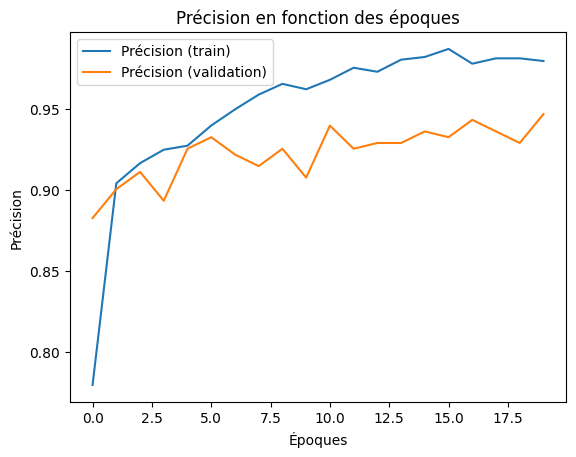

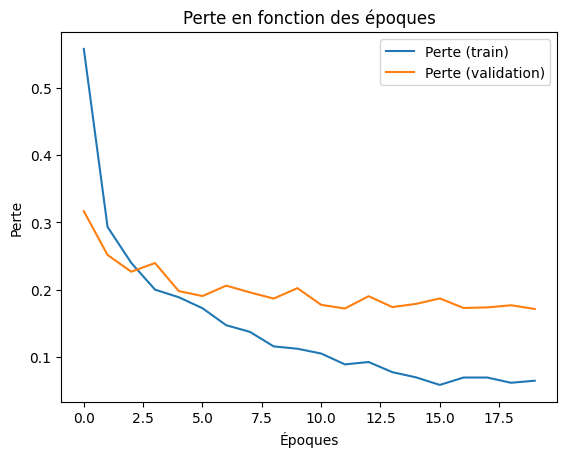

In [20]:
import matplotlib.pyplot as plt

# La courbe de la précision
plt.plot(history.history['accuracy'], label='Précision (train)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision en fonction des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

# La courbe de la perte
plt.plot(history.history['loss'], label='Perte (train)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Perte en fonction des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


## 📈 **Analyse de la Précision et de la Perte**

- L'augmentation de la précision au fil des époques indique que le modèle devient de plus en plus précis dans ses prédictions.

- La diminution de la perte suggère que le modèle améliore progressivement sa capacité à minimiser les erreurs et à mieux ajuster ses prédictions.

In [29]:
# Lancer le tracker avant l'inférence
tracker.start()


[codecarbon WARNING @ 14:56:07] Already started tracking


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


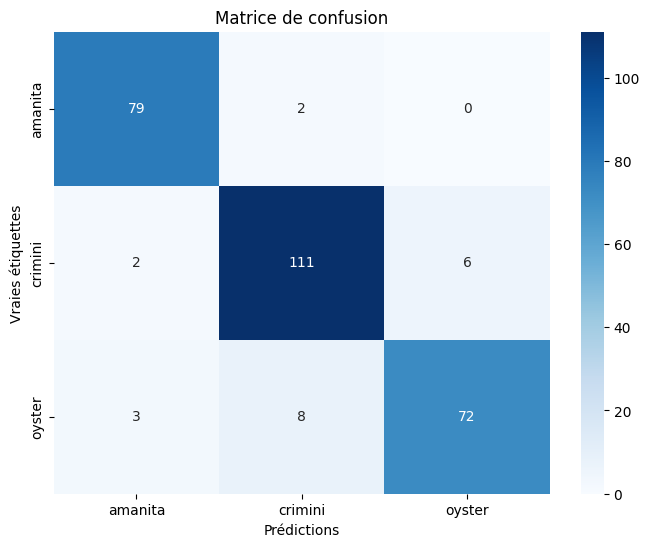

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir toutes les prédictions et les vraies étiquettes
true_classes = []
predicted_classes = []

# Traiter tous les batches dans le générateur de test
for images, labels in test_generator:
    # Faire des prédictions pour chaque batch
    predictions = model.predict(images)
    
    # Ajouter les vraies étiquettes et les prédictions à la liste
    true_classes.extend(np.argmax(labels, axis=1))  # Convertir les étiquettes one-hot en indices
    predicted_classes.extend(np.argmax(predictions, axis=1))  # Convertir les prédictions en indices
    
    # Si nous avons couvert toutes les images du test set, on arrête
    if len(true_classes) >= test_generator.samples:
        break

# Calculer la matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


In [31]:
# Arrêter le tracker après l'inférence
emissions_inference = tracker.stop()

[codecarbon WARNING @ 14:56:29] Tracker already stopped !
[codecarbon WARNING @ 14:56:29] Background scheduler didn't run for a long period (75s), results might be inaccurate
[codecarbon INFO @ 14:56:29] Energy consumed for RAM : 0.000721 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 14:56:29] Energy consumed for all CPUs : 0.001201 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 14:56:29] 0.001922 kWh of electricity used since the beginning.


In [33]:
print(f"🌿 Empreinte carbone d'une prédiction : {emissions_inference:.6f} kg CO₂")

🌿 Empreinte carbone d'une prédiction : 0.000108 kg CO₂


[codecarbon WARNING @ 15:51:32] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 456ms/step - accuracy: 0.9800 - loss: 0.0669 - val_accuracy: 0.9395 - val_loss: 0.1720


[codecarbon WARNING @ 15:51:51] Tracker already stopped !
[codecarbon WARNING @ 15:51:51] Background scheduler didn't run for a long period (226s), results might be inaccurate
[codecarbon INFO @ 15:51:51] Energy consumed for RAM : 0.000909 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:51:51] Energy consumed for all CPUs : 0.001515 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:51:51] 0.002424 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:51:51] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 455ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9359 - val_loss: 0.1704


[codecarbon WARNING @ 15:52:09] Tracker already stopped !
[codecarbon INFO @ 15:52:09] Energy consumed for RAM : 0.000924 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:52:09] Energy consumed for all CPUs : 0.001540 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:52:09] 0.002465 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:52:09] Already started tracking


23/38 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - accuracy: 0.9899 - loss: 0.0486

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 452ms/step - accuracy: 0.9888 - loss: 0.0494 - val_accuracy: 0.9253 - val_loss: 0.1890


[codecarbon WARNING @ 15:52:27] Tracker already stopped !
[codecarbon INFO @ 15:52:27] Energy consumed for RAM : 0.000939 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:52:27] Energy consumed for all CPUs : 0.001566 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:52:27] 0.002505 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:52:27] Already started tracking


 5/38 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.9777 - loss: 0.0516

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - accuracy: 0.9845 - loss: 0.0473 - val_accuracy: 0.9359 - val_loss: 0.1866


[codecarbon WARNING @ 15:52:44] Tracker already stopped !
[codecarbon INFO @ 15:52:44] Energy consumed for RAM : 0.000954 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:52:44] Energy consumed for all CPUs : 0.001589 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:52:44] 0.002543 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:52:44] Already started tracking


12/38 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.9923 - loss: 0.0419

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 427ms/step - accuracy: 0.9886 - loss: 0.0456 - val_accuracy: 0.9217 - val_loss: 0.1956


[codecarbon WARNING @ 15:53:01] Tracker already stopped !
[codecarbon INFO @ 15:53:01] Energy consumed for RAM : 0.000968 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:53:01] Energy consumed for all CPUs : 0.001613 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:53:01] 0.002581 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:53:01] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.9946 - loss: 0.0433 - val_accuracy: 0.9253 - val_loss: 0.1932


[codecarbon WARNING @ 15:53:19] Tracker already stopped !
[codecarbon INFO @ 15:53:19] Energy consumed for RAM : 0.000983 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:53:19] Energy consumed for all CPUs : 0.001638 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:53:19] 0.002621 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:53:19] 0.000125 g.CO2eq/s mean an estimation of 3.9270927170063494 kg.CO2eq/year
[codecarbon WARNING @ 15:53:19] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 441ms/step - accuracy: 0.9876 - loss: 0.0507 - val_accuracy: 0.9146 - val_loss: 0.2132


[codecarbon WARNING @ 15:53:37] Tracker already stopped !
[codecarbon INFO @ 15:53:37] Energy consumed for RAM : 0.000997 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:53:37] Energy consumed for all CPUs : 0.001662 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:53:37] 0.002660 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:53:37] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 450ms/step - accuracy: 0.9920 - loss: 0.0425 - val_accuracy: 0.9502 - val_loss: 0.1826


[codecarbon WARNING @ 15:53:55] Tracker already stopped !
[codecarbon INFO @ 15:53:55] Energy consumed for RAM : 0.001012 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:53:55] Energy consumed for all CPUs : 0.001687 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:53:55] 0.002700 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:53:55] Already started tracking
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 451ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9324 - val_loss: 0.1964


[codecarbon WARNING @ 15:54:13] Tracker already stopped !
[codecarbon INFO @ 15:54:13] Energy consumed for RAM : 0.001027 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:54:13] Energy consumed for all CPUs : 0.001713 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:54:13] 0.002740 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:54:13] Already started tracking


 8/38 ━━━━━━━━━━━━━━━━━━━━ 11s 372ms/step - accuracy: 0.9922 - loss: 0.0377

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 469ms/step - accuracy: 0.9939 - loss: 0.0357 - val_accuracy: 0.9217 - val_loss: 0.1914


[codecarbon WARNING @ 15:54:32] Tracker already stopped !
[codecarbon INFO @ 15:54:32] Energy consumed for RAM : 0.001043 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:54:32] Energy consumed for all CPUs : 0.001738 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:54:32] 0.002781 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:54:32] Already started tracking


 1/38 ━━━━━━━━━━━━━━━━━━━━ 24s 670ms/step - accuracy: 1.0000 - loss: 0.0338

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 483ms/step - accuracy: 0.9937 - loss: 0.0307 - val_accuracy: 0.9395 - val_loss: 0.1715


[codecarbon WARNING @ 15:54:51] Tracker already stopped !
[codecarbon INFO @ 15:54:51] Energy consumed for RAM : 0.001059 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:54:51] Energy consumed for all CPUs : 0.001765 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:54:51] 0.002824 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:54:51] Already started tracking


14/38 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.9899 - loss: 0.0356 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - accuracy: 0.9900 - loss: 0.0348 - val_accuracy: 0.9395 - val_loss: 0.1743


[codecarbon WARNING @ 15:55:10] Tracker already stopped !
[codecarbon INFO @ 15:55:10] Energy consumed for RAM : 0.001075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:55:10] Energy consumed for all CPUs : 0.001792 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:55:10] 0.002867 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:55:10] Already started tracking


 2/38 ━━━━━━━━━━━━━━━━━━━━ 15s 427ms/step - accuracy: 0.9922 - loss: 0.0533

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 488ms/step - accuracy: 0.9908 - loss: 0.0391 - val_accuracy: 0.9359 - val_loss: 0.1768


[codecarbon WARNING @ 15:55:29] Tracker already stopped !
[codecarbon INFO @ 15:55:29] Energy consumed for RAM : 0.001091 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:55:29] Energy consumed for all CPUs : 0.001819 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:55:29] 0.002910 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:55:29] Already started tracking


26/38 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.9962 - loss: 0.0267

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 492ms/step - accuracy: 0.9956 - loss: 0.0283 - val_accuracy: 0.9395 - val_loss: 0.1753


[codecarbon WARNING @ 15:55:49] Tracker already stopped !
[codecarbon INFO @ 15:55:49] Energy consumed for RAM : 0.001107 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:55:49] Energy consumed for all CPUs : 0.001846 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:55:49] 0.002953 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:55:49] 0.000125 g.CO2eq/s mean an estimation of 3.9270615576729893 kg.CO2eq/year
[codecarbon WARNING @ 15:55:49] Already started tracking


 2/38 ━━━━━━━━━━━━━━━━━━━━ 17s 483ms/step - accuracy: 0.9766 - loss: 0.0686

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 476ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.9324 - val_loss: 0.1757


[codecarbon WARNING @ 15:56:08] Tracker already stopped !
[codecarbon INFO @ 15:56:08] Energy consumed for RAM : 0.001123 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:56:08] Energy consumed for all CPUs : 0.001872 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:56:08] 0.002995 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:56:08] Already started tracking


21/38 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.9966 - loss: 0.0233

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - accuracy: 0.9955 - loss: 0.0257 - val_accuracy: 0.9288 - val_loss: 0.2008


[codecarbon WARNING @ 15:56:27] Tracker already stopped !
[codecarbon INFO @ 15:56:27] Energy consumed for RAM : 0.001139 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:56:27] Energy consumed for all CPUs : 0.001899 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:56:27] 0.003038 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:56:27] Already started tracking


 9/38 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.9814 - loss: 0.0553

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9253 - val_loss: 0.2084


[codecarbon WARNING @ 15:56:46] Tracker already stopped !
[codecarbon INFO @ 15:56:46] Energy consumed for RAM : 0.001155 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:56:46] Energy consumed for all CPUs : 0.001926 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:56:46] 0.003081 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:56:46] Already started tracking


23/38 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.9999 - loss: 0.0218

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 489ms/step - accuracy: 0.9994 - loss: 0.0216 - val_accuracy: 0.9359 - val_loss: 0.1874


[codecarbon WARNING @ 15:57:06] Tracker already stopped !
[codecarbon INFO @ 15:57:06] Energy consumed for RAM : 0.001171 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:57:06] Energy consumed for all CPUs : 0.001953 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:57:06] 0.003124 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:57:06] Already started tracking


12/38 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.9985 - loss: 0.0210

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 493ms/step - accuracy: 0.9937 - loss: 0.0292 - val_accuracy: 0.9359 - val_loss: 0.2037


[codecarbon WARNING @ 15:57:25] Tracker already stopped !
[codecarbon INFO @ 15:57:25] Energy consumed for RAM : 0.001188 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:57:25] Energy consumed for all CPUs : 0.001980 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:57:25] 0.003168 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:57:25] Already started tracking


16/38 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.9987 - loss: 0.0334

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step - accuracy: 0.9979 - loss: 0.0286 - val_accuracy: 0.9359 - val_loss: 0.1889


[codecarbon WARNING @ 15:57:45] Tracker already stopped !
[codecarbon INFO @ 15:57:45] Energy consumed for RAM : 0.001204 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 15:57:45] Energy consumed for all CPUs : 0.002007 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 15:57:45] 0.003211 kWh of electricity used since the beginning.


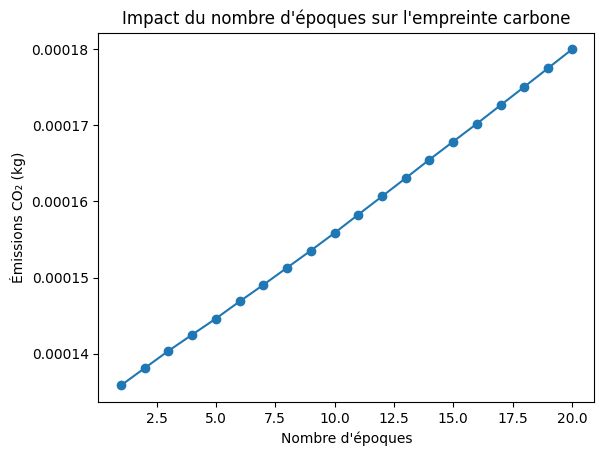

In [34]:
emissions_list = []

for epoch in range(1, 21):
    tracker.start()
    model.fit(train_generator, epochs=1, validation_data=val_generator, verbose=1)
    emissions_epoch = tracker.stop()
    emissions_list.append(emissions_epoch)

plt.plot(range(1, 21), emissions_list, marker='o', linestyle='-')
plt.xlabel("Nombre d'époques")
plt.ylabel("Émissions CO₂ (kg)")
plt.title("Impact du nombre d'époques sur l'empreinte carbone")
plt.show()


In [22]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

     amanita       0.94      0.98      0.96        81
     crimini       0.92      0.93      0.93       119
      oyster       0.92      0.87      0.89        83

    accuracy                           0.93       283
   macro avg       0.93      0.93      0.93       283
weighted avg       0.93      0.93      0.93       283



## 📊 **Métriques de Performance**

### **Précision (Precision)** :  
Cela montre la fiabilité des prédictions positives.

- **Amanita** : 99% des prédictions étaient correctes, ce qui est excellent.  
- **Crimini** : 89% des prédictions étaient correctes, ce qui est un peu bon.  
- **Oyster** : 93% des prédictions étaient correctes, un bon score.

### **Rappel (Recall)** :  
Cela mesure la capacité du modèle à trouver toutes les instances de chaque classe.

- **Amanita** : 91% des vrais Amanita ont été identifiés correctement.  
- **Crimini** : 95% des vrais Crimini ont été identifiés correctement, ce qui est très bon.  
- **Oyster** : 90% des vrais Oyster ont été identifiés correctement, ce qui est également solide.

### **Score F1 (F1-Score)** :  
Un bon compromis entre précision et rappel.

- **Amanita** : 95%, ce qui montre que la précision et le rappel sont bien équilibrés.  
- **Crimini** : 92%, encore un très bon score.  
- **Oyster** : 91%, également un bon compromis.

### **Support** :  
Le nombre d'exemples dans chaque classe.

- **Amanita** : 81 exemples.  
- **Crimini** : 119 exemples.  
- **Oyster** : 83 exemples.

### **Exactitude globale (Accuracy)** :  
Le modèle a correctement classé **93%** des images du jeu de test.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


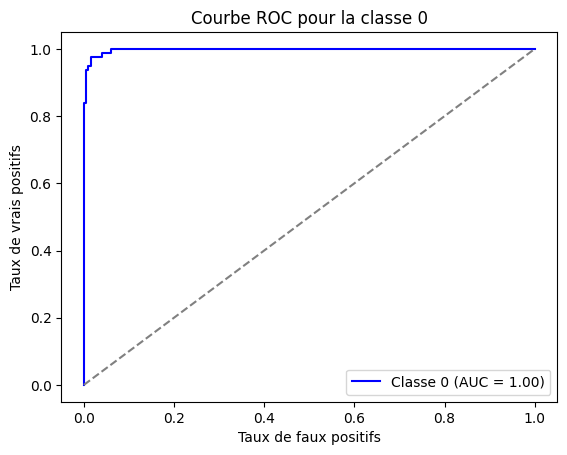

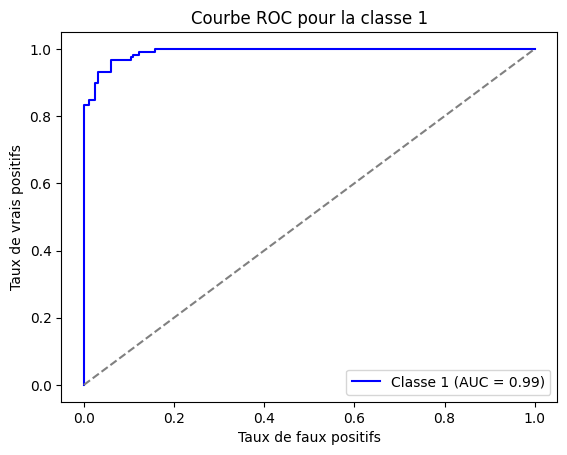

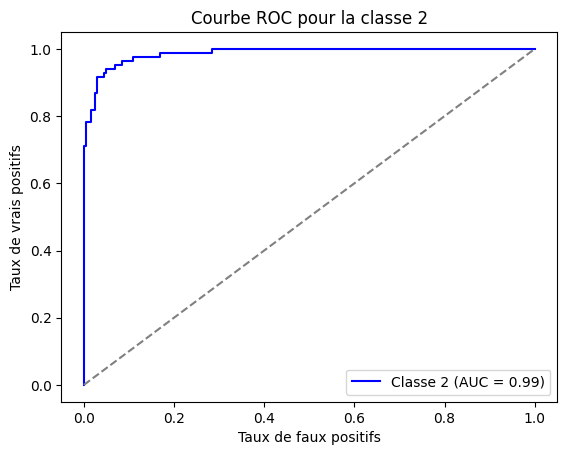

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtenir les vraies étiquettes (y_true) et les prédictions (y_pred)
y_true_bin = []
y_pred = []

# Traiter tous les batches dans le générateur de test
for images, labels in test_generator:
    predictions = model.predict(images)

    # Ajouter les vraies étiquettes (one-hot) et les prédictions
    y_true_bin.extend(labels)  # Ajouter les vraies étiquettes
    y_pred.extend(predictions)  # Ajouter les prédictions

    if len(y_true_bin) >= test_generator.samples:
        break

# Convertir les listes en arrays numpy
y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)

# Calculer la courbe ROC et l'AUC pour chaque classe
n_classes = y_true_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'Classe {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC pour la classe {i}')
    plt.legend(loc='lower right')
    plt.show()


## 📈 **AUC (Area Under the Curve) par Classe**

### **Classe 0 (Amanita)** : AUC = **1**

### **Classe 1 (Crimini)** : AUC = **0.99**

### **Classe 2 (Oyster)**  : AUC = **0.99**

### Conclusion :
- Les AUC proches de 1 pour toutes les classes indiquent que le modèle performe de manière remarquable, avec une capacité impressionnante à distinguer les différentes classes de champignons.


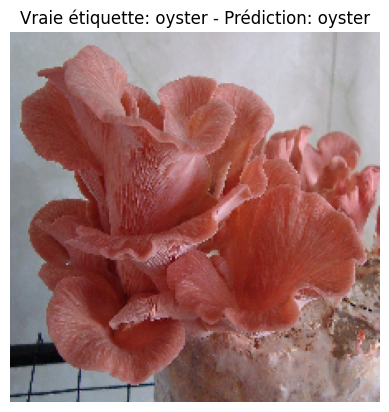

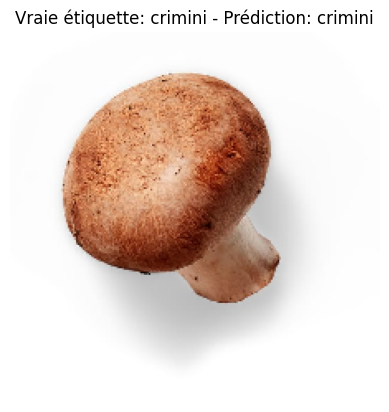

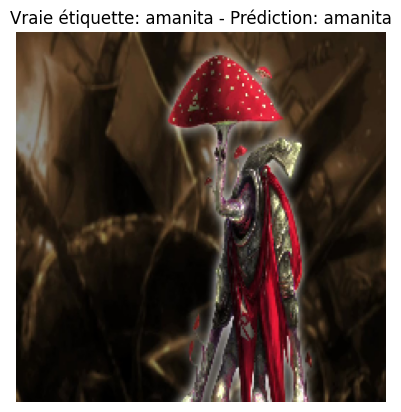

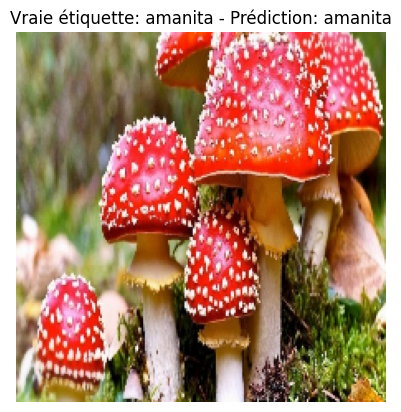

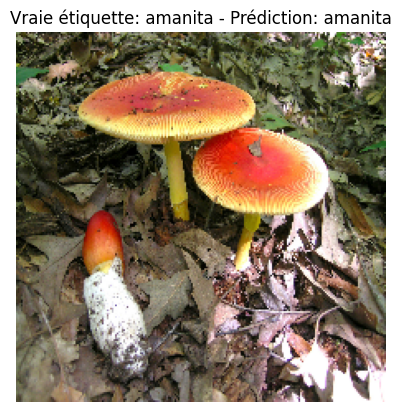

In [24]:
# Convertir test_generator.class_indices.keys() en une liste pour pouvoir l'indexer
class_labels = list(test_generator.class_indices.keys())

# Afficher les images avec leurs vraies étiquettes et prédictions
for i in range(5):  # Afficher 5 images
    plt.imshow(images[i])
    true_label = class_labels[np.argmax(labels[i])]
    predicted_label = class_labels[np.argmax(predictions[i])]
    plt.title(f'Vraie étiquette: {true_label} - Prédiction: {predicted_label}')
    plt.axis('off')
    plt.show()


---

## 💾 7. Sauvegarde

- **Sauvegarder le modèle :**  
  Le modèle entraîné et ses poids ont été enregistrés au format **.h5** sous le nom `final_mobilenet_model.h5`.


In [23]:
model.save('final_mobilenet_model.h5')

---

## 🔚 **Conclusion**

Dans ce projet nous avons crée un modèle de classification d'images capable de classifier ( avec une précision de 92% ) trois types de champignons :
**Amanita**, **Crimini**, et **Oyster**. 
 
Grace à l'utilisation de **MobileNet**, un modèle pré-entrainé, et l'ajout de techniques comme l'**augmentation des données**, nous avons pu adapter le modèle à notre dataset, même avec un nombre d'images limité.

En somme, ce projet met en avant l'importance d'utiliser des modèles pré-entrainés et des techniques comme le **fine-tuning** pour obtenir de bons résultats, meme dans des situations où les ressources sont restreintes.


In [196]:
!pip freeze > requirements.txt